# Setting up

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 5
plt.rcParams['axes.labelsize'] = 14

In [5]:
import numpy as np
import pickle

from DDAS import MakeReal
from AntennaSelection import generateLROASdata, generateOASdata, generateSASdata, calculateBERwithAS
from symbols import SymbolGenerator, MLdecoder
from channels import KroneckerRayleighChannelMIMO

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.base import clone

In [6]:
data_prep_pipeline = Pipeline([
    ('toReal', MakeReal(RealPart = False, ImaginaryPart=False, magnitude = True, Phase = False)),
    ('stdScaler', StandardScaler()),
])

In [4]:
# Nt = 2
# Nr = 10

# N = 100000
# CSIvar = 0.5

# X_oas, y_oas= generateOASdata(N, nt = Nt, nr = Nr, CSIvariance = CSIvar)
# X_sas, y_sas = generateSASdata(N//100, nt = Nt, nr = Nr, CSIvariance = CSIvar)
# X_lroas, y_lroas = generateLROASdata(N//100, nt = Nt, nr = Nr, CSIvariance = CSIvar)

# outfile = open('./train_data/x_oasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(X_oas, outfile) 
# outfile.close()

# outfile = open('./train_data/y_oasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(y_oas, outfile)
# outfile.close()

# outfile = open('./train_data/X_sasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(X_sas, outfile)
# outfile.close()

# outfile = open('./train_data/y_sasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(y_sas, outfile)
# outfile.close()

# outfile = open('./train_data/X_lroasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(X_lroas, outfile)
# outfile.close()

# outfile = open('./train_data/y_lroasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'wb')
# pickle.dump(y_lroas, outfile)
# outfile.close()

In [5]:
# X_oas_test, y_oas_test = generateOASdata(1000,nt = Nt, nr = Nr, CSIvariance = CSIvar)
# X_sas_test, y_sas_test = generateSASdata(1000,nt = Nt, nr = Nr, CSIvariance = CSIvar)
# X_lroas_test, y_lroas_test = generateLROASdata(1000,nt = Nt, nr =Nr, CSIvariance = CSIvar)

# infile = open('./train_data/x_oasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# X_oas = pickle.load(infile)
# infile.close()

# infile = open('./train_data/y_oasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# y_oas = pickle.load(infile)
# infile.close()

# infile = open('./train_data/X_sasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# X_sas = pickle.load(infile)
# infile.close()

# infile = open('./train_data/y_sasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# y_sas = pickle.load(infile)
# infile.close()

# infile = open('./train_data/X_lroasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# X_lroas = pickle.load(infile)
# infile.close()

# infile = open('./train_data/y_lroasNt{}Nr{}Var{}'.format(Nt,Nr, CSIvar),'rb')
# y_lroas = pickle.load(infile)
# infile.close()

# pl_oas = clone(data_prep_pipeline)
# pl_sas = clone(data_prep_pipeline)
# pl_lroas = clone(data_prep_pipeline)

# X_oas = pl_oas.fit_transform(X_oas)
# X_oas_test = pl_oas.transform(X_oas_test)

# outfile = open('./models/pl_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(pl_oas,outfile)
# outfile.close()

# X_sas = pl_sas.fit_transform(X_sas)
# X_sas_test = pl_sas.transform(X_sas_test)

# outfile = open('./models/pl_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(pl_sas,outfile)
# outfile.close()

# X_lroas = pl_lroas.fit_transform(X_lroas)
# X_lroas_test = pl_lroas.transform(X_lroas_test)


# outfile = open('./models/pl_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(pl_lroas,outfile)
# outfile.close()

In [6]:
# mlpc_oas = MLPClassifier(max_iter=1000)
# svc_oas = SVC()
# knn_oas = KNeighborsClassifier(n_neighbors=51)

# mlpc_sas = MLPClassifier(max_iter=1000)
# svc_sas = SVC()
# knn_sas = KNeighborsClassifier(n_neighbors=51)

# mlpc_lroas = MLPClassifier(max_iter=1000)
# svc_lroas = SVC()
# knn_lroas = KNeighborsClassifier(n_neighbors=51)

# print('Classifiers for OAS')
# mlpc_oas.fit(X_oas, y_oas)
# print('MLP Classifier score:',mlpc_oas.score(X_oas_test, y_oas_test))
# svc_oas.fit(X_oas,y_oas)
# print('SVM score:',svc_oas.score(X_oas_test, y_oas_test))
# knn_oas.fit(X_oas,y_oas)
# print('KNN score:',knn_oas.score(X_oas_test, y_oas_test))

# print('Classifiers for SAS')
# mlpc_sas.fit(X_sas, y_sas)
# print('MLP Classifier score:',mlpc_sas.score(X_sas_test, y_sas_test))
# svc_sas.fit(X_sas,y_sas)
# print('SVM score:',svc_sas.score(X_sas_test, y_sas_test))
# knn_sas.fit(X_sas,y_sas)
# print('KNN score:',knn_sas.score(X_sas_test, y_sas_test))

# print('Classifiers for LROAS')
# mlpc_lroas.fit(X_lroas, y_lroas)
# print('MLP Classifier score:',mlpc_lroas.score(X_lroas_test, y_lroas_test))
# #svc_lroas.fit(X_lroas,y_lroas)
# # print('SVM score:',svc_lroas.score(X_lroas_test, y_lroas_test))
# knn_lroas.fit(X_lroas,y_lroas)
# print('KNN score:',knn_sas.score(X_sas_test, y_sas_test))

In [7]:
# outfile = open('./models/mlpc_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(mlpc_oas,outfile)
# outfile.close()

# outfile = open('./models/mlpc_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(mlpc_sas,outfile)
# outfile.close()

# outfile = open('./models/mlpc_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(mlpc_lroas,outfile)
# outfile.close()

# outfile = open('./models/knn_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(knn_oas,outfile)
# outfile.close()

# outfile = open('./models/knn_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(knn_sas,outfile)
# outfile.close()

# outfile = open('./models/knn_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(knn_lroas,outfile)
# outfile.close()

# outfile = open('./models/svm_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(svc_oas,outfile)
# outfile.close()

# outfile = open('./models/svm_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'wb')
# pickle.dump(svc_sas,outfile)
# outfile.close()

In [8]:
# infile = open('./models/pl_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# pl_oas =  pickle.load(infile)
# infile.close()

# infile = open('./models/pl_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# pl_sas =  pickle.load(infile)
# infile.close()

# infile = open('./models/pl_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# pl_lroas =  pickle.load(infile)
# infile.close()


# infile = open('./models/mlpc_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# mlpc_oas = pickle.load(infile)
# infile.close()

# infile = open('./models/mlpc_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# mlpc_sas = pickle.load(infile)
# infile.close()

# infile = open('./models/mlpc_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# mlpc_lroas = pickle.load(infile)
# infile.close()

# infile = open('./models/knn_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# knn_oas = pickle.load(infile)
# infile.close()

# infile = open('./models/knn_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# knn_sas = pickle.load(infile)
# infile.close()

# infile = open('./models/knn_lroas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# knn_lroas = pickle.load(infile)
# infile.close()

# infile = open('./models/svm_oas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# svm_oas = pickle.load(infile)
# infile.close()

# infile = open('./models/svm_sas_Nt{}Nr{}Var{}'.format(Nt,Nr, CSIvar), 'rb')
# svm_sas = pickle.load(infile)
# infile.close()    

In [7]:
from AntennaSelection import AntennaSelector

def checkAccuracy(n, model,j, CSIvar, Nt = 2, Nr = 2):
    if(model.loc['Selection'][j] == 'oas'):
        X,y,chU, chE = generateOASdata(n, nt = Nt, nr = Nr, CSIvariance = CSIvar, returnChannel = True)
        X = model.loc['pipeline'][j].transform(X)
    elif(model.loc['Selection'][j] == 'sas'):
        X,y,chU = generateSASdata(n, nt = Nt, nr = Nr, CSIvariance =CSIvar, returnChannel = True)
        X = model.loc['pipeline'][j].transform(X)
    elif(model.loc['Selection'][j] == 'lroas'):
        X,y,chU = generateLROASdata(n, nt = Nt, nr = Nr, CSIvariance = CSIvar, returnChannel = True)
        X = model.loc['pipeline'][j].transform(X)
    
    modelAccuracy = model.loc['model'][j].score(X,y)
    errors = 0
    
    for i in range(n):
        if(model.loc['Selection'][j] == 'sas'):
            AS = AntennaSelector(chU[i])
            yy = AS.SuboptimalAntennaSelection(CSIvar = CSIvar)
        elif(model.loc['Selection'][j] == 'lroas'):
            AS = AntennaSelector(chU[i])
            yy = AS.LinearReceiverOptimalAntennaSet(CSIvar = CSIvar)
        elif(model.loc['Selection'][j] == 'oas'):
            AS = AntennaSelector(chU[i], chE[i])
            yy = AS.OptimalAntennaSelection(CSIvar = CSIvar)
        else:
            raise ValueError('Method \'{}\' does not exist'.format(model.loc['Selection'][0]))
        
        if(model.loc['Selection'][j]!='lroas'):
            if(yy != y[i]):
                errors += 1
        else:
            ind = np.array(yy,dtype=int)
            z = np.zeros(Nt)
            z[ind] = 1
            
            if(not np.array_equal(z,y[i])):
                errors += 1
    
    ASaccuracy = (n-errors)/n
    return modelAccuracy, ASaccuracy

In [8]:
def trainModels(models, Nt, Nr, Ntest = 0):
    s = models['model'].shape
    n = s[0]
    for i in range(n):
        
        if(models['Selection'][i] == 'oas'):
            X, y= generateOASdata(models['N'][i], nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
            X = models['pipeline'][i].fit_transform(X)
            
            if(Ntest > 0):
                X_test, y_test = generateOASdata(Ntest, nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
                X_test = models['pipeline'][i].transform(X_test)
        
        elif(models['Selection'][i] == 'sas'):
            X, y= generateSASdata(models['N'][i], nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
            X = models['pipeline'][i].fit_transform(X)
            
            if(Ntest > 0):
                X_test, y_test = generateSASdata(Ntest, nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
                X_test = models['pipeline'][i].transform(X_test)
        
        elif(models['Selection'][i] == 'lroas'):
            X, y= generateLROASdata(models['N'][i], nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
            X = models['pipeline'][i].fit_transform(X)
            
            if(Ntest > 0):
                X_test, y_test = generateLROASdata(Ntest, nt = Nt, nr = Nr, CSIvariance = models['CSIvar'][i])
                X_test = models['pipeline'][i].transform(X_test)
        else:
            raise ValueError('Unkwown selecetion method: \'{}\''.format(models['Selection'][0]))
        
        models['model'][i].fit(X,y)
        
        if(Ntest>0):
            print('MLPC {} model with CSI var {}, score: {}'.format(models['Selection'][i], 
                  models['CSIvar'][i], models['model'][i].score(X_test,y_test)))
        else:
            print('{:2} of {:2} done'.format(i, n))

In [9]:
import pandas as pd

mlpc_sas = MLPClassifier(max_iter=1000)
mlpc_sas_001 = MLPClassifier(max_iter=1000)
mlpc_sas_01 = MLPClassifier(max_iter=1000)
mlpc_sas_1 = MLPClassifier(max_iter=10000)

mlpc_oas = MLPClassifier(max_iter=10000)
mlpc_oas_001 = MLPClassifier(max_iter=1000)
mlpc_oas_01 = MLPClassifier(max_iter=1000)
mlpc_oas_1 = MLPClassifier(max_iter=10000)

mlpc_lroas = MLPClassifier(max_iter=10000)
mlpc_lroas_001 = MLPClassifier(max_iter=1000)
mlpc_lroas_01 = MLPClassifier(max_iter=1000)
mlpc_lroas_1 = MLPClassifier(max_iter=10000)

N=int(1e5)
models = {
    'model':[mlpc_sas, mlpc_sas_001,mlpc_sas_01,mlpc_sas_1, mlpc_oas, mlpc_oas_001,mlpc_oas_01,mlpc_oas_1, mlpc_lroas, mlpc_lroas_001,mlpc_lroas_01,mlpc_lroas_1],
    'CSIvar':[0,0.01,0.1,1,0,0.01,0.1,1,0,0.01,0.1,1],
    'N':[N,N,N,N,N, N,N,N,N//100, N//100,N//100,N//100],
    'Selection':['sas','sas','sas','sas','oas', 'oas', 'oas', 'oas','lroas', 'lroas', 'lroas', 'lroas'],
    'pipeline':[clone(data_prep_pipeline) for i in range(12)],
}

models = pd.DataFrame(models)

s = models['model'].shape
print(s[0])

12


In [10]:
Nt = 2
Nr = 10
Ntest = 1000

trainModels(models, Nt, Nr, Ntest)

MLPC sas model with CSI var 0.0, score: 0.982
MLPC sas model with CSI var 0.01, score: 0.976
MLPC sas model with CSI var 0.1, score: 0.959
MLPC sas model with CSI var 1.0, score: 0.678
MLPC oas model with CSI var 0.0, score: 0.975
MLPC oas model with CSI var 0.01, score: 0.966
MLPC oas model with CSI var 0.1, score: 0.938
MLPC oas model with CSI var 1.0, score: 0.653
MLPC lroas model with CSI var 0.0, score: 0.903
MLPC lroas model with CSI var 0.01, score: 0.926
MLPC lroas model with CSI var 0.1, score: 0.923
MLPC lroas model with CSI var 1.0, score: 0.613


In [11]:
def getAccuracyCurves(model,j, N , CSIvar,nt=2, nr=2):
    n = len(CSIvar)
    model_acc = np.zeros(n)
    acc = np.zeros(n)
    for i in range(n):
        model_acc[i], acc[i] = checkAccuracy(N, model,j, CSIvar[i], Nt = nt, Nr =nr)
    
    return model_acc, acc



0 done
1 done
2 done
3 done


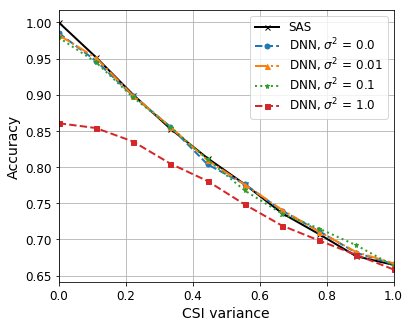

In [12]:
CSIvar = np.linspace(0,1,10)
style = ['o--', '^-.', '*:','s--']


plt.figure(figsize=(6,5))
b = False;
for i in range(4):
    model_acc, acc = getAccuracyCurves(pd.DataFrame(models.iloc[i]), i,int(1e4), CSIvar, nt=Nt, nr=Nr)
    if(b == False):
        plt.plot(CSIvar, acc, 'kx-',label='SAS')
        b = True
    print(i, 'done')
    plt.plot(CSIvar,model_acc, style[i%4] ,label='DNN, $\sigma^2$ = {}'.format(models['CSIvar'][i]))





# plt.title('SAS')
plt.xlim([0,1])
plt.legend(labelspacing=0.2)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('CSI variance')
plt.ylabel('Accuracy')
plt.savefig('/home/markos/Desktop/paper/imperfect_csi_sas.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.show()

4 done
5 done
6 done
7 done


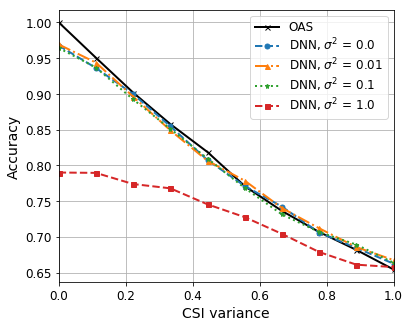

In [13]:
plt.figure(figsize=(6,5))

b = False
for i in range(4,8):
    
    model_acc, acc = getAccuracyCurves(pd.DataFrame(models.iloc[i]),i, int(1e4), CSIvar, nt=Nt, nr=Nr)
    if(b == False):
        plt.plot(CSIvar, acc, 'kx-',label='OAS')
        b = True
    plt.plot(CSIvar,model_acc,style[i%4], label='DNN, $\sigma^2$ = {}'.format(models['CSIvar'][i]))
    print(i, 'done')

plt.legend()


# plt.title('OAS')
plt.xlim([0,1])
plt.legend(labelspacing=0.2)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('CSI variance')
plt.ylabel('Accuracy')
plt.savefig('/home/markos/Desktop/paper/imperfect_csi_oas.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.show()

8 done
9 done
10 done
11 done


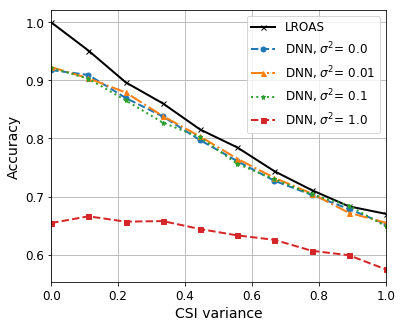

In [14]:
plt.figure(figsize=(6,5))
b = False

for i in range(8,12):
    model_acc, acc = getAccuracyCurves(pd.DataFrame(models.iloc[i]), i,int(1e4),CSIvar, nt=Nt, nr=Nr)
    if(b == False):
        plt.plot(CSIvar, acc, 'kx-',label='LROAS')
        b = True
    plt.plot(CSIvar,model_acc,style[i%4] ,label='DNN, $\sigma^2$= {}'.format(models['CSIvar'][i]))
    print(i, 'done')

# plt.title('LROAS')
plt.xlim([0,1])
plt.legend(labelspacing=0.2)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
plt.xlabel('CSI variance')
plt.ylabel('Accuracy')

plt.savefig('/home/markos/Desktop/paper/imperfect_csi_lroas.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.show()